In [51]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

(213, 212, 3)


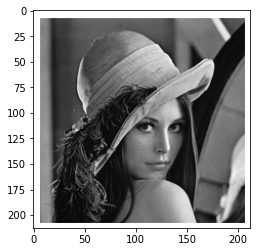

In [52]:
img = mpimg.imread('./doc/pca/original.png')
plt.imshow(img)
print(img.shape)

(90, 90)


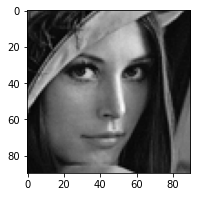

In [53]:
#Reducing the amount of pixels
img_first_channel = img[:,:,0]
img_first_channel.shape
img_first_channel = img_first_channel[80:170,80:170]
print(img_first_channel.shape)

fig, ax = plt.subplots(figsize=(6, 3))
ax.imshow(img_first_channel, cmap='gray')

In [54]:
plain = img_first_channel.reshape((1,-1)) #Flatten image
plain.shape

(1, 8100)

In [68]:
#Defining the goal
features = plain.shape[1]
obj = features//2
print(features, obj)

8100 4050


Epoch 1 ==> Loss: 0.3347836434841156
Epoch 2 ==> Loss: 0.2994517982006073
Epoch 3 ==> Loss: 0.26773303747177124
Epoch 4 ==> Loss: 0.24819882214069366
Epoch 5 ==> Loss: 0.2308209389448166
Epoch 6 ==> Loss: 0.21643944084644318
Epoch 7 ==> Loss: 0.20898747444152832
Epoch 8 ==> Loss: 0.2084408849477768
Epoch 9 ==> Loss: 0.20425012707710266
Epoch 10 ==> Loss: 0.19672943651676178
Epoch 11 ==> Loss: 0.19622835516929626
Epoch 12 ==> Loss: 0.18800854682922363
Epoch 13 ==> Loss: 0.1914977878332138
Epoch 14 ==> Loss: 0.19389380514621735
Epoch 15 ==> Loss: 0.1923561692237854
Epoch 16 ==> Loss: 0.19081127643585205
Epoch 17 ==> Loss: 0.1905846744775772
Epoch 18 ==> Loss: 0.18768805265426636
Epoch 19 ==> Loss: 0.1887880116701126
Epoch 20 ==> Loss: 0.19164352118968964
Epoch 21 ==> Loss: 0.19658225774765015
Epoch 22 ==> Loss: 0.19334188103675842
Epoch 23 ==> Loss: 0.1860724538564682
Epoch 24 ==> Loss: 0.19177858531475067
Epoch 25 ==> Loss: 0.1945948451757431
Epoch 26 ==> Loss: 0.19842346012592316
Epoch

Epoch 212 ==> Loss: 0.3124539852142334
Epoch 213 ==> Loss: 0.30857113003730774
Epoch 214 ==> Loss: 0.31266310811042786
Epoch 215 ==> Loss: 0.31124022603034973
Epoch 216 ==> Loss: 0.3084956109523773
Epoch 217 ==> Loss: 0.3118904232978821
Epoch 218 ==> Loss: 0.31125861406326294
Epoch 219 ==> Loss: 0.30999594926834106
Epoch 220 ==> Loss: 0.31296035647392273
Epoch 221 ==> Loss: 0.3093360662460327
Epoch 222 ==> Loss: 0.3101184666156769
Epoch 223 ==> Loss: 0.3137175738811493
Epoch 224 ==> Loss: 0.30358442664146423
Epoch 225 ==> Loss: 0.306105375289917
Epoch 226 ==> Loss: 0.30541113018989563
Epoch 227 ==> Loss: 0.3106190264225006
Epoch 228 ==> Loss: 0.31135350465774536
Epoch 229 ==> Loss: 0.31520000100135803
Epoch 230 ==> Loss: 0.3075873553752899
Epoch 231 ==> Loss: 0.3069927990436554
Epoch 232 ==> Loss: 0.3029947280883789
Epoch 233 ==> Loss: 0.30602115392684937
Epoch 234 ==> Loss: 0.30629903078079224
Epoch 235 ==> Loss: 0.305406779050827
Epoch 236 ==> Loss: 0.3047822117805481
Epoch 237 ==> L

Epoch 421 ==> Loss: 0.2577156126499176
Epoch 422 ==> Loss: 0.2576565742492676
Epoch 423 ==> Loss: 0.25667425990104675
Epoch 424 ==> Loss: 0.2572425901889801
Epoch 425 ==> Loss: 0.25617170333862305
Epoch 426 ==> Loss: 0.26020753383636475
Epoch 427 ==> Loss: 0.2560162842273712
Epoch 428 ==> Loss: 0.2551472783088684
Epoch 429 ==> Loss: 0.2547488212585449
Epoch 430 ==> Loss: 0.25743627548217773
Epoch 431 ==> Loss: 0.2532595992088318
Epoch 432 ==> Loss: 0.25353506207466125
Epoch 433 ==> Loss: 0.25313225388526917
Epoch 434 ==> Loss: 0.25583717226982117
Epoch 435 ==> Loss: 0.25136029720306396
Epoch 436 ==> Loss: 0.2594106197357178
Epoch 437 ==> Loss: 0.2507536709308624
Epoch 438 ==> Loss: 0.2585401237010956
Epoch 439 ==> Loss: 0.2483174353837967
Epoch 440 ==> Loss: 0.25135302543640137
Epoch 441 ==> Loss: 0.25614023208618164
Epoch 442 ==> Loss: 0.2564122974872589
Epoch 443 ==> Loss: 0.2527347505092621
Epoch 444 ==> Loss: 0.25584876537323
Epoch 445 ==> Loss: 0.2474174201488495
Epoch 446 ==> Los

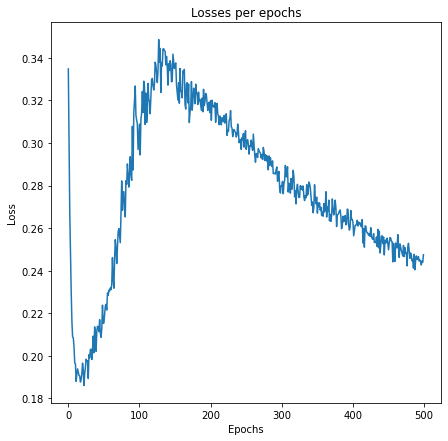

In [69]:
# Creating the model
%run "./RBM.py"

neural_net = RBM(features, obj)
history = neural_net.train(plain, l2_cost, verbose = True)

## showing stats
def plot(losses):
    plt.figure(figsize=(7, 7))
    plt.title('Losses per epochs')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.plot(losses)
    
plot(history)

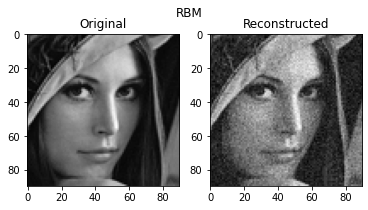

In [72]:
#Testing the network
reconstructed = neural_net.getReconstructedOutput(plain)

_aux = int(features ** (1/2))

fig, (vax, hax) = plt.subplots(1, 2, figsize=(6, 3))
vax.imshow(img_first_channel, cmap='gray')
vax.set_title('Original')
hax.imshow(reconstructed.reshape((1,_aux,_aux))[0], cmap='gray')
hax.set_title('Reconstructed')
plt.suptitle('RBM')
plt.savefig('simple_image_output.png')